# JUST IMPORT STUFF

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.model_selection as skmodelselect
%matplotlib inline
from sklearn.impute import SimpleImputer as skLearnSimpleImputer
from sklearn.preprocessing import OrdinalEncoder as skLearnOrdinalEncoder
from sklearn.preprocessing import OneHotEncoder as skLearnOneHotEncoder


# IMPORTING DATA FUNCTION

In [2]:
path_data = os.path.join("datasets", "housing")

def load_housing_data(path = path_data):
    return pd.read_csv(os.path.join(path, "housing.csv"))

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# DATA ANALYSIS

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

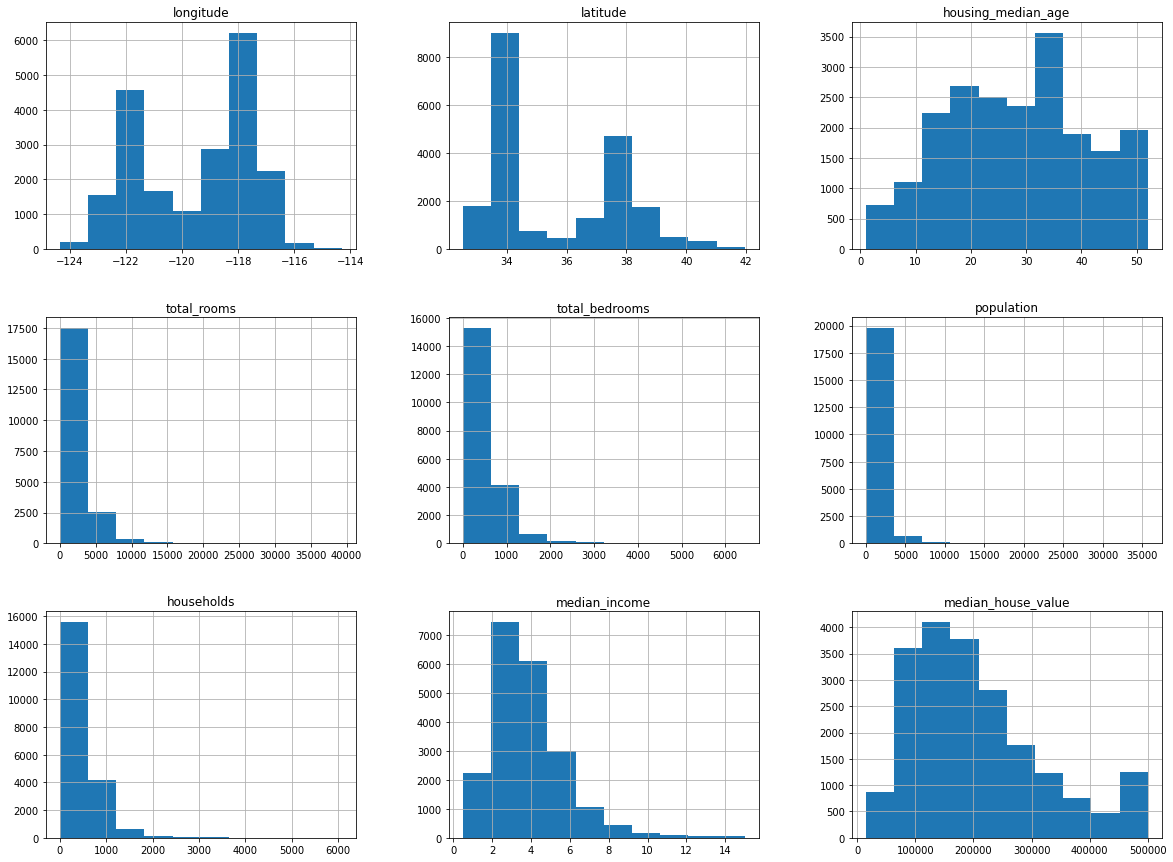

In [9]:
housing.hist(figsize = (20, 15))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

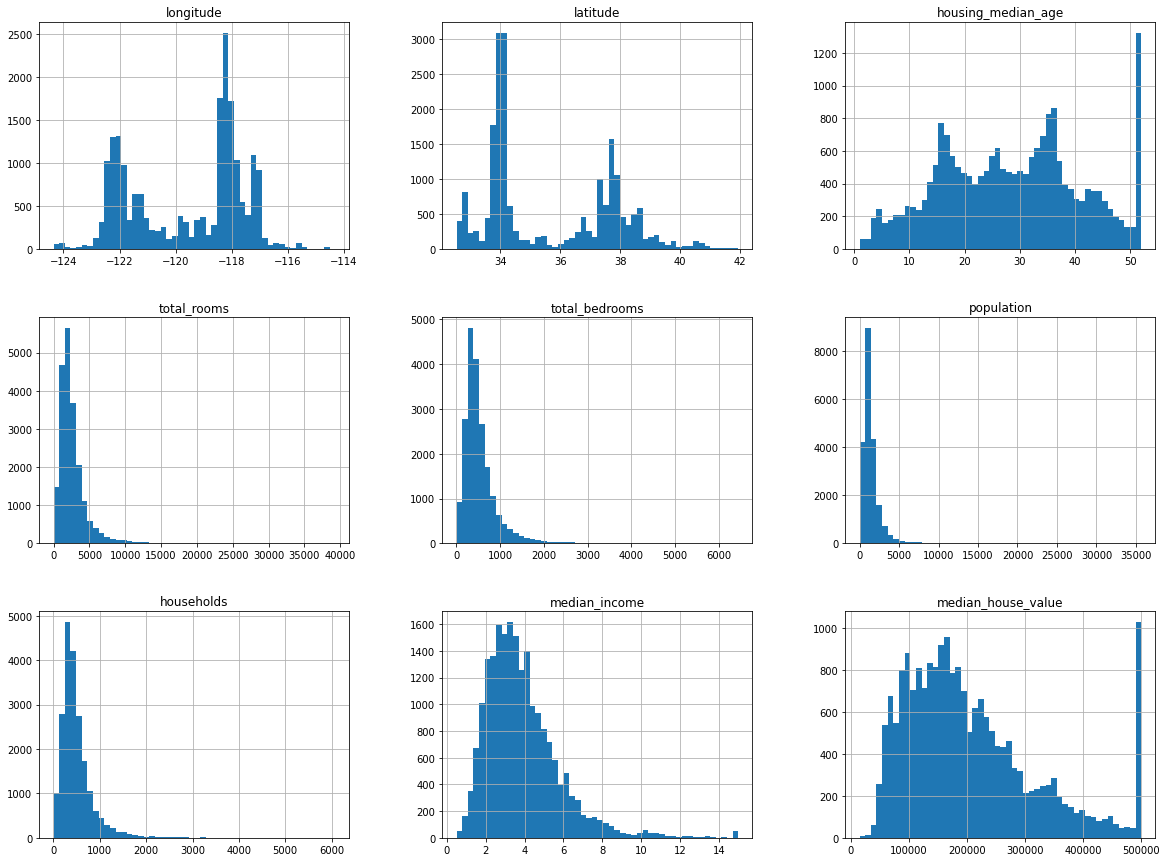

In [10]:
housing.hist(bins = 50, figsize = (20, 15))

In [11]:
housing.iloc[[4, 2, 1]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


# SPLITTING DATA USING NP.RANDON.PERMUTATION 
## THIS IS NOT VERY EFFECTIVE IF DATA IS REGULARLY CHANGING

In [12]:
def split_training_data(dataFrame, testset_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(dataFrame))
    test_set_size = int(len(dataFrame) * testset_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return dataFrame.iloc[test_indices], dataFrame.iloc[train_indices]

test_set, train_set = split_training_data(housing, 0.2)
[len(test_set), len(train_set)]

[4128, 16512]

# WHERE THINGS FALL APART
### NP RANDOM PERMUTAION WILL GENERATE NEW TRAINING SETS EVERYTIME FOR TRAINING. THIS MEANS EVENTIALLY AFTER SUFFECIENT NO OF RUNS IT WILL COVER WHOLE DATASET.  THIS IS BAD FOR TRAINING AND TESTING

### WE USED SEED FOR GENERATING SAME SET EVERYTIME FOR TRAINING.  BUT IT ALSO FAILS IF DATA SIZE CHANGES EVERY NOW AND THEN.
# TO SOLVE THIS WE USE HASH FUNCTION (SEE BOOK FOR CODE NOT IMPLEMENTED HERE).

In [13]:
housing_with_id = housing.reset_index()   #This aads xtra index column in the dataset
housing_with_id.head()                    #This can be used for hashing

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_with_id["ID"] = housing["longitude"] * 1000 + housing["latitude"]  #CREATES NEW ID ATTRIBUTE IN DATAFRAME
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ID
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


# NOW WE WILL USE SKLEARN FOR DIVIDING THE DATA

In [15]:
train_set, test_set = skmodelselect.train_test_split(housing, test_size=0.2, random_state=42)
# Test size 0.2 means 20% data is for training
# Random state 42 is same as np random seed = 42

# DIVIDING THE INCOME INTO MULTIPLE CATEGORIES
### Here we divided median income into 5 categories : 0 to 1.5 ; 1.5 to 3 and so on. This step was taken to make the data more bell shaped for easy processing and also remember that each category should have certain minimum entries for better and unbiased learning.
### This breakdown of data into unbiased multiple categories is called stratification.

In [16]:
partitions = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_category"] = partitions
type(partitions)

pandas.core.series.Series

<AxesSubplot:>

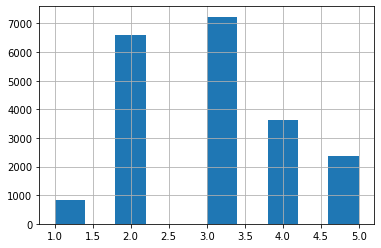

In [17]:
housing["income_category"].hist()

# SKLEARN FOR STRATIFIED TRAIN TEST SPLIT
### SKLEARN.STRATIFIEDSUFFLESPLIT(n_split= , test_size= , random_state= ) creates an object on which several methods can be applied for partioning the data in several parts for cross-validation.
### .SPLIT(x, y) : Here x is dataframe and y is series. x is whole data set which has to be partioned. y is target in which we want that equality of quantity should be maintained. Even after random partion each category in y will contain same fraction of data as specified in test_size.
### This removes skewness.

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [19]:
split = skmodelselect.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_ind, test_ind in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_ind]
    strat_test_set = housing.loc[test_ind]

In [20]:
strat_train_set["income_category"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_category, dtype: int64

In [21]:
strat_test_set["income_category"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_category, dtype: int64

In [22]:
testcount = strat_test_set["income_category"].value_counts()
traincount = strat_train_set["income_category"].value_counts()
testcount/(testcount + traincount)

3    0.199972
2    0.199970
4    0.200055
5    0.199831
1    0.200730
Name: income_category, dtype: float64

## REMOVING "INCOME CATEGORY" TO SEND DATA TO PREVIOUS STATE

In [23]:
for i in (strat_test_set,  strat_train_set):
    i.drop("income_category", axis=1, inplace=True)
    

    
# Above code is equivalent to :
'''
strat_test_set.drop("income_category", axis=1, inplace=True)
strat_train_set.drop("income_category", axis=1, inplace=True)
'''

'\nstrat_test_set.drop("income_category", axis=1, inplace=True)\nstrat_train_set.drop("income_category", axis=1, inplace=True)\n'

# VISUALISE DATA
### CREATE COPY OF TRAINING SET TO PLAY WITH

In [24]:
train_copy = strat_train_set.copy()

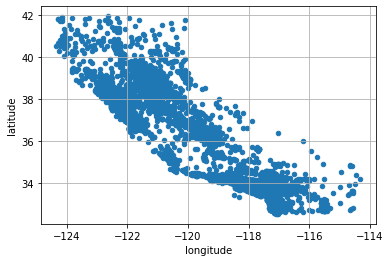

In [25]:
train_copy.plot(kind="scatter", x="longitude", y="latitude")
plt.grid()

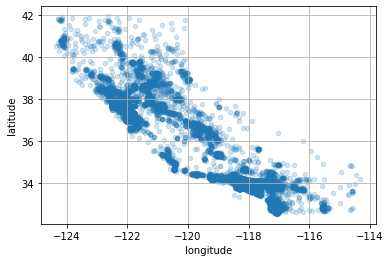

In [26]:
train_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.grid()

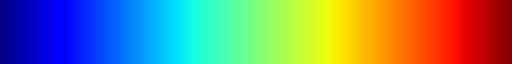

In [27]:
plt.get_cmap("jet")

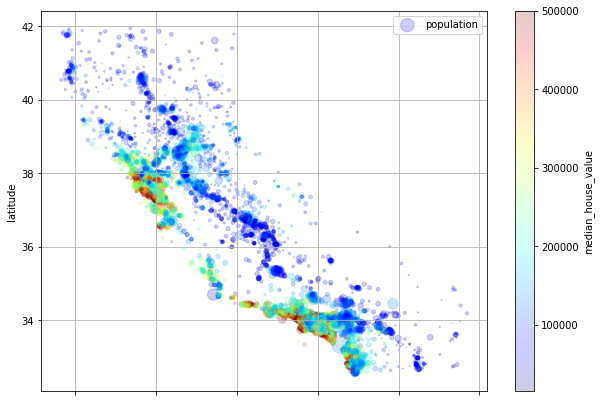

In [28]:
train_copy.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.2,
    s=train_copy["population"]/100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
'''
*** s is size of circle varies with the population size
*** c is colour of the circle varies with the size of house price
*** cmap is colour scheme used for c. Use default "jet" for this purpose. Red is high and Blue is low.
'''
plt.grid()

## CORRELATIONS IN DATA

In [29]:
# corr_matrix

In [30]:
corr_matrix = train_copy.corr()
corr_matrix["median_house_value"]

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:>

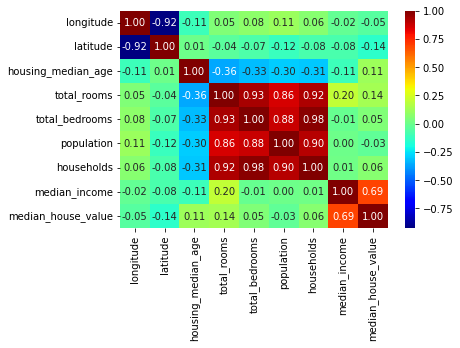

In [32]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=plt.get_cmap("jet"))

In [33]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
train_copy[attributes].corr()

,median_house_value,median_income,total_rooms,housing_median_age
median_house_value,1.000000,0.687151,0.135140,0.114146
median_income,0.687151,1.000000,0.200133,-0.111315
total_rooms,0.135140,0.200133,1.000000,-0.364535
housing_median_age,0.114146,-0.111315,-0.364535,1.000000


<AxesSubplot:>

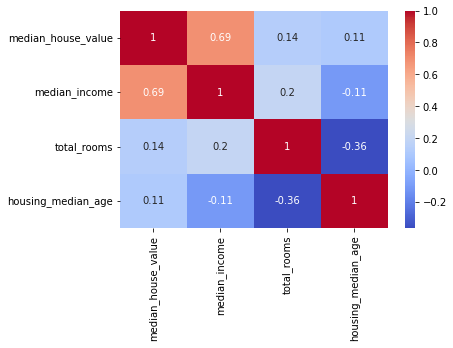

In [34]:
sns.heatmap(train_copy[attributes].corr(), annot=True, cmap="coolwarm")

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

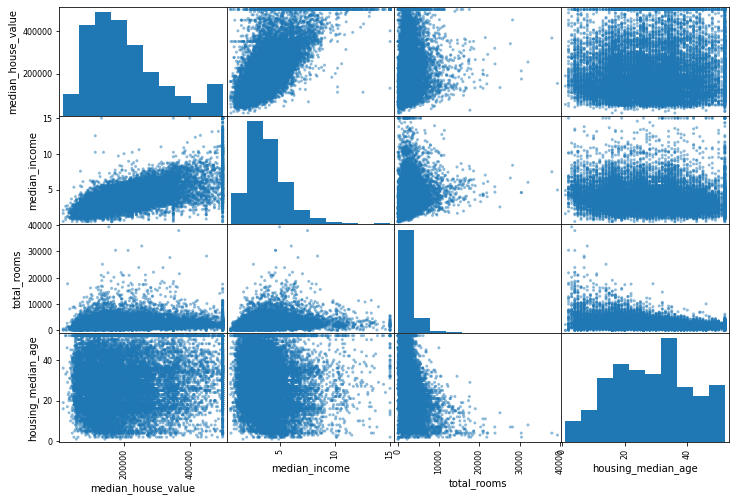

In [35]:
pd.plotting.scatter_matrix(train_copy[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

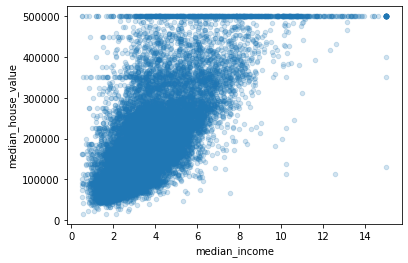

In [36]:
train_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

# DATA PREPERATION FOR ML MODEL
### FROM TRAINING SET REMOVE OUTPUT FIELD AND SOTORE IT SOMEWHERE

In [37]:
data = strat_train_set.drop("median_house_value", axis=1)   # This creates copy does not alter strat_train_set
data_lables = strat_train_set["median_house_value"].copy()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Clearly total_bedrooms has 20433 not-null values and some NULL values. We can solve this by either of this :
### 1) Drop whole column   >>> 
#### data.drop("column_name", axis=1)
### 2) Drop particular Tuple(Row)   >>> 
#### data.dropna(subset=["total_bedrooms"])
### 3) Feed approximate data(mean/ median) or set it to zero etc. (You will use same value in testset too)   >>>
####                              median = data["column_name"].median()
####                              data["column_name"].fillna(median, inplace=True)

In [39]:
data_using_pd = data.copy()
median = data_using_pd["total_bedrooms"].median()
data_using_pd["total_bedrooms"].fillna(median, inplace=True)
data_using_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Using SKLEARN's Simple Imputer for this job 

In [40]:
imputer = skLearnSimpleImputer(strategy="median")
only_numerical_data = data.drop("ocean_proximity", axis=1)
imputer.fit(only_numerical_data)
only_numerical_data.info()         # THIS ONLY TRAINS IMPUTER DOESNOT FILL THE VALUE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Now check every field values before sys goes live for any inconsistancy...

In [41]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
only_numerical_data.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

## Now fill the data of only_numerical_data into data
#### 1) transform only_numerical_data to numpy array
#### 2) transform again into pandas dataframe

In [43]:
X = imputer.transform(only_numerical_data)
data_retransformed = pd.DataFrame(X, columns=only_numerical_data.columns, index=only_numerical_data.index)
data_retransformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## Handleing Non Numeric Data
### USING SKLEARN.PROCESSING -> OrdinalEncoder
##### Problem >>> THIS CREATES ENUM LIKE INT VALUES AND ASSIGNS BUT Machine Learning MODELS CAN MISUNDERSTAND. THEY MAY THINK 0 AND 1 ARE CLOSELY RELATED THAN 0 AND 4. THIS IS FALSE AS 0, 1, 2, ... ARE JUST CATEGORY NAMES.

### USING ONE HOT ENCODING
##### MAKE EACH CATEGORY A VECTOR

In [44]:
type(housing["ocean_proximity"])

pandas.core.series.Series

In [45]:
type(housing[["ocean_proximity"]])

pandas.core.frame.DataFrame

In [46]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

### USING ORDINAL ENCODER

In [47]:
ordEncoder = skLearnOrdinalEncoder()
housing_cat_encoded_oceanProximity = ordEncoder.fit_transform(housing_cat)
housing_cat_encoded_oceanProximity[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [48]:
print("Type : ", type(housing_cat_encoded_oceanProximity))
ordEncoder.categories_

Type :  <class 'numpy.ndarray'>


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### USING VECTOR (ONE HOT) ENCODER
##### One Hot stores vectors in form of Sparse matrix with SciPy Library working in background. We can change it to array by toarray() method.

In [49]:
vectorEncoder = skLearnOneHotEncoder()
housing_cat_vectorised_oceanProximity = vectorEncoder.fit_transform(housing_cat)

print("TYPE : ", type(housing_cat_vectorised_oceanProximity))
housing_cat_vectorised_oceanProximity

TYPE :  <class 'scipy.sparse._csr.csr_matrix'>


<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_vectorised_oceanProximity.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
vectorEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]